In [1]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# GROUP PROPOSAL: WINE TASTING

## Introduction

## Preliminary exploratory data analysis

1. Data Reading

In [2]:
temp <- tempfile()
download_file <- download.file("https://archive.ics.uci.edu/static/public/186/wine+quality.zip", temp)
red_wine <- read.csv2(unz(temp, "winequality-red.csv")) |>
             mutate(type = "Red")
white_wine <- read.csv2(unz(temp, "winequality-white.csv")) |>
              mutate(type ="White")
unlink(temp)

2. Data Wrangling

In [3]:
wine_data <- rbind(red_wine, white_wine) |>
             mutate(across(fixed.acidity:alcohol, as.numeric), quality = as_factor(quality),
                   type = as_factor(type))
write_csv(wine_data, "../data/wine_data.csv")
head(wine_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Red


3. Summarization

a. The number of observations in each red wine/white wine class

In [4]:
wine_type_number <- wine_data |>
                    group_by(type) |>
                    summarize(Number = n())
wine_type_number

type,Number
<fct>,<int>
Red,1599
White,4898


Therefore, we have 4898 observations for White wine and 1599 observations for Red wine.

b. The number of observations for each quality level of White and Red wine.

In [5]:
quality_number <- wine_data |>
                  group_by(type, quality) |>
                  summarize(Number = n())
quality_number

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type,quality,Number
<fct>,<fct>,<int>
Red,3,10
Red,4,53
Red,5,681
Red,6,638
Red,7,199
Red,8,18
White,3,20
White,4,163
White,5,1457


c. Mean value of each measurements for different quality type.

In [6]:
mean_measurements <- wine_data |>
                     group_by(type, quality) |>
                     summarize(mean_fixed_acidity = mean(fixed.acidity),
                               mean_volatile_acidity = mean(volatile.acidity),
                               mean_citric_acid = mean(citric.acid),
                               mean_residual_sugar = mean(residual.sugar),
                               mean_chlorides = mean(chlorides),
                               mean_free_sufdioxide = mean(free.sulfur.dioxide),
                               mean_tot_sufdioxide = mean(total.sulfur.dioxide),
                               mean_density = mean(density),
                               mean_ph = mean(pH),
                               mean_sulphates = mean(sulphates),
                               mean_alcohol = mean(alcohol))
mean_measurements

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type,quality,mean_fixed_acidity,mean_volatile_acidity,mean_citric_acid,mean_residual_sugar,mean_chlorides,mean_free_sufdioxide,mean_tot_sufdioxide,mean_density,mean_ph,mean_sulphates,mean_alcohol
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Red,3,8.360000,0.8845000,0.1710000,2.635000,0.12250000,11.00000,24.90000,0.9974640,3.398000,0.5700000,9.955000
Red,4,7.779245,0.6939623,0.1741509,2.694340,0.09067925,12.26415,36.24528,0.9965425,3.381509,0.5964151,10.265094
Red,5,8.167254,0.5770411,0.2436858,2.528855,0.09273568,16.98385,56.51395,0.9971036,3.304949,0.6209692,9.899706
Red,6,8.347179,0.4974843,0.2738245,2.477194,0.08495611,15.71160,40.86991,0.9966151,3.318072,0.6753292,10.629519
Red,7,8.872362,0.4039196,0.3751759,2.720603,0.07658794,14.04523,35.02010,0.9961043,3.290754,0.7412563,11.465913
Red,8,8.566667,0.4233333,0.3911111,2.577778,0.06844444,13.27778,33.44444,0.9952122,3.267222,0.7677778,12.094444
White,3,7.600000,0.3332500,0.3360000,6.392500,0.05430000,53.32500,170.60000,0.9948840,3.187500,0.4745000,10.345000
White,4,7.129448,0.3812270,0.3042331,4.628221,0.05009816,23.35890,125.27914,0.9942767,3.182883,0.4761350,10.152454
White,5,6.933974,0.3020110,0.3376527,7.334969,0.05154633,36.43205,150.90460,0.9952626,3.168833,0.4822032,9.808840


d. Missing data - We have no missing data in this dataset.

4. Visualization

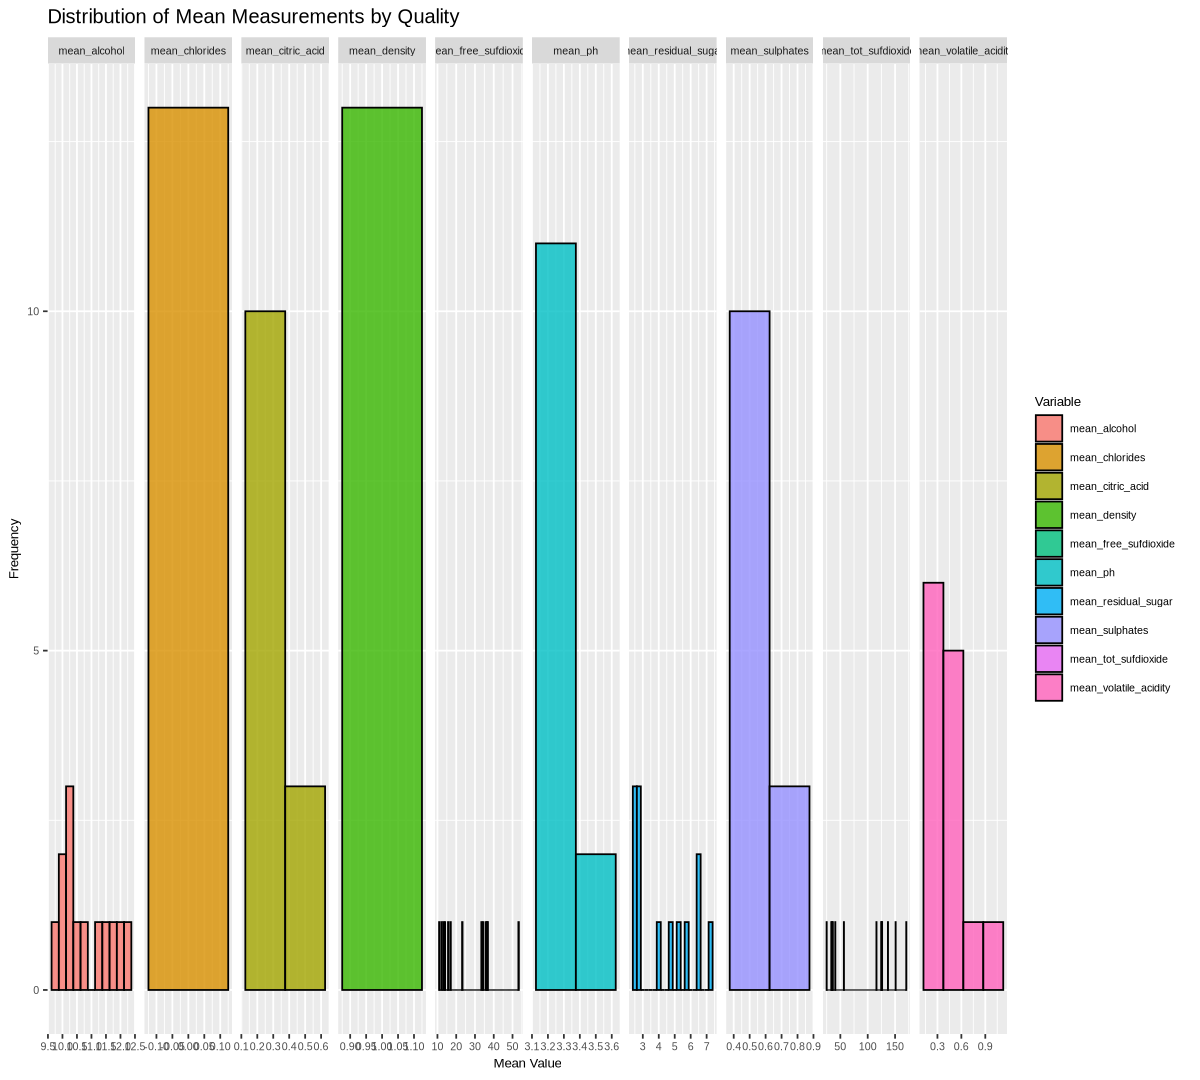

In [62]:
mean_measurements_long <- mean_measurements %>%
  pivot_longer(cols = starts_with("mean"), names_to = "variable", values_to = "mean_value")

mean_histograms <- mean_measurements_long %>%
  ggplot(aes(x = mean_value, fill = variable)) +
  geom_histogram(binwidth = 0.25, position = "dodge", color = "black", alpha = 0.8) +
  facet_grid(~variable, scales = "free") +
  labs(title = "Distribution of Mean Measurements by Quality",
       x = "Mean Value",
       y = "Frequency",
       fill = "Variable") +
  theme(text = element_text(size = 8),
    plot.title = element_text(size = 12),
    plot.subtitle = element_text(size = 10),
    plot.caption = element_text(size = 8))

mean_histograms

## Methods

## Expected outcomes and significance